In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

## 의사 결정 나무
- 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다.
- 분류와 회귀 분석에 모두 사용될 수 있기 때문에 CART(Classification And Regression Tree)라고도 한다.

## 의사 결정 나무를 이용한 분류
- 1) 여러가지 독립 변수 중 하나의 독립 변수를 선택하고 기준값을 정한다. 이를 분류 규칙이라고 한다.
- 2) 전체 학습 데이터 집합을 해당 독립 변수의 값이 기준값보다 작은 데이터 그룹과 해당 독립 변수의 값이 기준값보다 큰 데이터 그룹으로 나눈다.
- 3) 각각의 자식 노드에 대해 1~2의 단계를 반복하여 하위의 자식 노드를 만든다. 단 자식 노드에 한가지 클래스의 데이터만 존재한다면 더 이상 자식 노드를 나누지 않고 중지한다.

## 의사 결정 나무를 사용한 분류 예측
- 데이터를 트리에 넣으면 각 데이터는 특정한 노드를 타고 내려가게 된다. 각 노드는 그 노드를 선택한 데이터 집합을 가진다.
- 이 대 노드에 속한 데이터의 클래스의 비율을 구하여 이를 그 노드의 조건부 확률 분포라고 정의한다. `P(Y=k|X){node}`

## 규칙 결정 방법
- 규칙을 정하는 방법은 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 최상의 독립 변수와 기준값을 찾는 것이다.
- 이러한 기준을 정량화한 것이 정보 획득량(information gain)이다.
- 기본적으로 모든 독립 변수와 모든 가능한 기준값에 대해 정보 획득량을 구하여 가장 정보 획득량이 큰 독립 변수와 기준값을 선택한다.
- `IG[Y,X] = H[Y] - H[Y|X]`
    - X라는 조건에 의해 확률 변수 Y의 엔트로피가 얼마나 감소하였는가를 나타내는 값이다.

- Assumption : 부모 노드는 {40,40} 이다.
- Case 1 : 자식 노드는 각각 {30,10} , {10,30}
- Case 2 : 자식 노드는 각각 {24,40} , {20,0}
-어떤 기준값을 선택해야 할까
    - 그 기준은 information gain이 높은 것을 선택하면 된다.
    - 계산해보자
   

In [2]:
import numpy as np
def entropy(prop):
    assert prop<=1
    return -1*prop*np.log2(prop) + -1*(1-prop)*np.log2(1-prop)

In [3]:
# case1의 부모 노드 확률은 40,40이기 때문에 1/2 , 1/2이다.
#우선 조건부 엔트로피를 계산한다. 그래야 정보 획득량을 구할 수 있으니까..
case1_condi_entropy = 1/2 * entropy(3/4) + 1/2*entropy(1/4)
case1_condi_entropy

0.8112781244591328

In [4]:
case1_cparent_node_entropy = entropy(1/2)
case1_cparent_node_entropy

1.0

In [5]:
case1_IG = case1_cparent_node_entropy - case1_condi_entropy
case1_IG

0.18872187554086717

In [6]:
# case2의 부모 노드 확률은 60,20이기 때문에 3/4 , 1/4이다.
case2_condi_entropy =  3/4 * entropy(1/3) + 1/4 * 0
case2_condi_entropy

0.6887218755408672

In [7]:
case2_parent_node_entropy = entropy(1/2)
case2_parent_node_entropy

1.0

In [8]:
case2_IG = case2_parent_node_entropy - case2_condi_entropy
case2_IG

0.31127812445913283

In [9]:
case1_IG < case2_IG

True

따라서 Case2 의 기준값(threshold)가 정보 획득량이 더 높기 때문에, 이를 택한다.

## Scikit-Learn의 의사 결정 나무 클래스
- `DecisionTreeClassifier` 클래스로 구현되어 있다.

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data[:,[2,3]] , iris.target

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0).fit(X,y)

In [13]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

NameError: name 'plot_decision_regions' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

In [ ]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)

In [ ]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [ ]:
confusion_matrix(y, tree2.predict(X))


In [ ]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)


In [ ]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()


#### 연습 문제 1
- 붓꽃 분류 문제에서 꽃받침의 길이와 폭을 사용하여 위와 같이 의사 결정 나무 모형을 만들고 정확도(accuracy) 기준으로 성능을 측정한다.
- K=5 인 교차 검증을 통해 테스트 성능 평균을 측정한다.
- max_depth 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 max_depth 인수를 찾아라.

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data , iris.target

In [16]:
from sklearn.model_selection import train_test_split , KFold , cross_val_score
train_X , test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X_sc = sc.fit_transform(train_X)
test_X_sc = sc.fit_transform(test_X)

In [20]:
train_X_sc[:10]

array([[ 0.61303014,  0.10850105,  0.94751783,  0.73603967],
       [-0.56776627, -0.12400121,  0.38491447,  0.34808318],
       [-0.80392556,  1.03851009, -1.30289562, -1.3330616 ],
       [ 0.25879121, -0.12400121,  0.60995581,  0.73603967],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25331499],
       [-0.80392556, -0.82150798,  0.04735245,  0.21876435],
       [-0.21352735,  1.73601687, -1.19037495, -1.20374277],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47740201],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34808318],
       [-0.09544771, -1.05401024,  0.10361279, -0.03987331]])

In [21]:
train_X.shape , train_y.shape, test_X.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

In [24]:
from sklearn.tree import DecisionTreeClassifier
iris_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0).fit(train_X,train_y)
iris_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
print(classification_report(test_y,iris_tree.predict(test_X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



In [26]:
confusion_matrix(test_y,iris_tree.predict(test_X))

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [27]:
accuracy_score(test_y,iris_tree.predict(test_X))

0.9666666666666667

- 여기까지가 의사결정트리의 프로세스에 대한 것이다.
- 하지만 트리의 장점은 역시 학습 모델을 시각화하여 볼 수 있다는 점이다.
- graphviz라는 것을 설치해주어야 한다. 

In [32]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

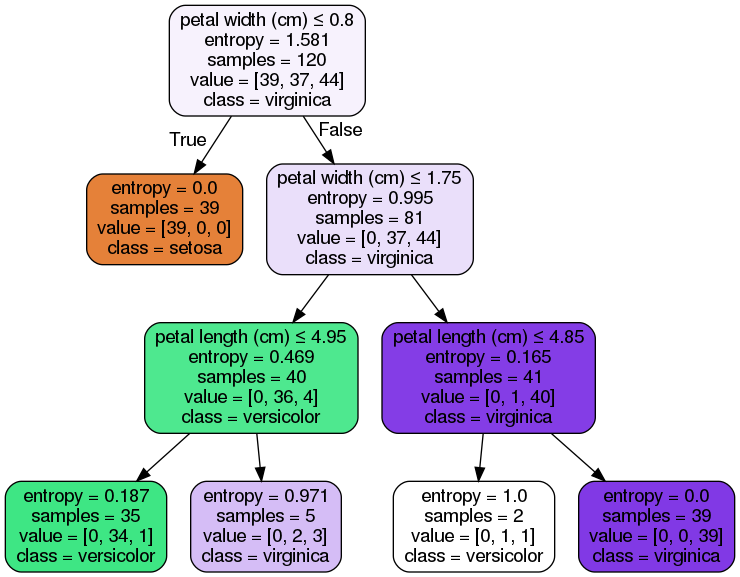

In [37]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


graphviz를 사용하면 위의 이미지처럼 직관적인 색으로 그룹을 분류까지 해준다.

based on : http://yamalab.tistory.com

based on from now on : http://scikit-learn.org/stable/modules/tree.html

### Decision Trees
- DTs are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

### Classification
- `DecisionTreeClassifier` is a class capable of performing multi-class classification on a datset.
- `DecisionTreeClassifier` is capable of both binary classification.

In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
clf = DecisionTreeClassifier()
clf = clf.fit(iris.data,iris.target)

Once trained, we can export the tree in `Graphviz` format using the `export_graphviz` exporter.

In [40]:
import graphviz
dot_data = export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris')

'iris.pdf'

The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

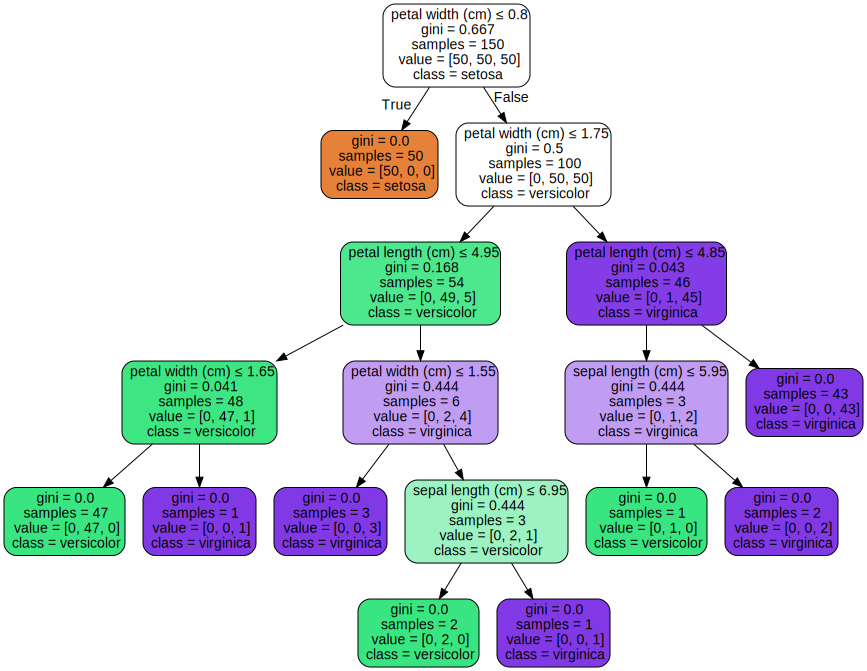

In [44]:
dot_data = export_graphviz(clf,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph